

1.  Niyathi Allu
2.  nallu002@ucr.edu
3.  862392991



# HW 3: Deep Ensembles & Covariate Shift


1. Download the train, validation, and test datasets (using code template)
2. Construct a classifier and train it.
a. Define a Pytorch module with a simple multi-layer perceptron architecture
b. Each classifier is randomly initialized and trained on the data
c. Repeat 10 times to make an ensemble of classifiers
3. Analyze and visualize the results. Detailed instructions about what should be shown are given in the write-up section.
a. The dataset features are 2-d so you can visualize the classifiers and data
b. Accuracy and expected calibration error, for train, validation, and test, comparing
individual models to the ensemble model.

In [ ]:
import torch
import torch as t
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


class MyClassifier(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)  
        self.bn1 = nn.BatchNorm1d(64)  
        self.fc2 = nn.Linear(64, n_classes)  

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)  
        x = torch.relu(x)
        x = self.fc2(x)
        return x

    
class MyEnsemble(t.nn.Module):
    def __init__(self, models):
        super().__init__()
        self.models = models

    def forward(self, x):
        outputs = [model(x) for model in self.models]
        outputs = torch.mean(torch.stack(outputs, dim=0), dim=0)
        # print(f"Shape of outputs in ensemble model : {outputs.shape}")
        return outputs



In [ ]:

# Load data and construct train dataloaders
x_train, y_train, x_val, y_val, x_test, y_test = t.load('hw3_data.pt')
print('dataset sizes: ', x_train.shape, x_val.shape, x_test.shape)


dataset sizes:  torch.Size([2000, 2]) torch.Size([2000, 2]) torch.Size([1000, 2])


In [ ]:
batch_size = 100
train_ds = t.utils.data.TensorDataset(x_train, y_train)
train_dl = t.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)


In [ ]:

# Create and train models
n_models = 10
models = []

for i in range(n_models):
    model = MyClassifier()

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    

    for epoch in range(10):
        
        running_loss = 0 

        for inputs, labels in train_dl:
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())  
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_dl)
        print(f"Model {i+1} | Epoch {epoch+1} | Loss: {epoch_loss:.4f}")

    models.append(model)  # store them for evaluation and ensembling

model_ens = MyEnsemble(models)  # Construct the ensemble model 


# for epoch in range(10):
#     running_loss = 0.0
#     for inputs, labels in train_dl:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.long())  # Convert labels to Long data type
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#     epoch_loss = running_loss / len(train_dl)
#     print(f"Model {i+1} | Epoch {epoch+1} | Loss: {epoch_loss:.4f}")



Model 1 | Epoch 1 | Loss: 0.4662
Model 1 | Epoch 2 | Loss: 0.2217
Model 1 | Epoch 3 | Loss: 0.1299
Model 1 | Epoch 4 | Loss: 0.0890
Model 1 | Epoch 5 | Loss: 0.0672
Model 1 | Epoch 6 | Loss: 0.0538
Model 1 | Epoch 7 | Loss: 0.0447
Model 1 | Epoch 8 | Loss: 0.0383
Model 1 | Epoch 9 | Loss: 0.0335
Model 1 | Epoch 10 | Loss: 0.0299
Model 2 | Epoch 1 | Loss: 0.5011
Model 2 | Epoch 2 | Loss: 0.2023
Model 2 | Epoch 3 | Loss: 0.1131
Model 2 | Epoch 4 | Loss: 0.0790
Model 2 | Epoch 5 | Loss: 0.0615
Model 2 | Epoch 6 | Loss: 0.0504
Model 2 | Epoch 7 | Loss: 0.0428
Model 2 | Epoch 8 | Loss: 0.0371
Model 2 | Epoch 9 | Loss: 0.0328
Model 2 | Epoch 10 | Loss: 0.0293
Model 3 | Epoch 1 | Loss: 0.3726
Model 3 | Epoch 2 | Loss: 0.1630
Model 3 | Epoch 3 | Loss: 0.0937
Model 3 | Epoch 4 | Loss: 0.0658
Model 3 | Epoch 5 | Loss: 0.0513
Model 3 | Epoch 6 | Loss: 0.0423
Model 3 | Epoch 7 | Loss: 0.0361
Model 3 | Epoch 8 | Loss: 0.0317
Model 3 | Epoch 9 | Loss: 0.0283
Model 3 | Epoch 10 | Loss: 0.0256
Model 4

In [ ]:
import torch

def accuracy(model, x, y):
    with torch.no_grad():
        model.eval()
        outputs = model(x)
        # print(f"Outputs:{outputs}")
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y).sum().item() / len(y)
    return accuracy

In [ ]:
for i, model in enumerate(models):
    acc_train = accuracy(model, x_train, y_train)
    acc_val = accuracy(model, x_val, y_val)
    acc_test = accuracy(model, x_test, y_test)
    print(f"Model {i+1}: Train Accuracy: {acc_train:.4f}, Validation Accuracy: {acc_val:.4f}, Test Accuracy: {acc_test:.4f}")


Model 1: Train Accuracy: 0.9960, Validation Accuracy: 0.9955, Test Accuracy: 0.8890
Model 2: Train Accuracy: 0.9935, Validation Accuracy: 0.9935, Test Accuracy: 0.7900
Model 3: Train Accuracy: 0.9925, Validation Accuracy: 0.9940, Test Accuracy: 0.8780
Model 4: Train Accuracy: 0.9935, Validation Accuracy: 0.9940, Test Accuracy: 0.6900
Model 5: Train Accuracy: 0.9950, Validation Accuracy: 0.9950, Test Accuracy: 0.8290
Model 6: Train Accuracy: 0.9925, Validation Accuracy: 0.9905, Test Accuracy: 0.6200
Model 7: Train Accuracy: 0.9935, Validation Accuracy: 0.9920, Test Accuracy: 0.8040
Model 8: Train Accuracy: 0.9935, Validation Accuracy: 0.9940, Test Accuracy: 0.6520
Model 9: Train Accuracy: 0.9965, Validation Accuracy: 0.9960, Test Accuracy: 0.7890
Model 10: Train Accuracy: 0.9925, Validation Accuracy: 0.9900, Test Accuracy: 0.7890


In [ ]:
def ece(model, x, y, bins=10):
    with torch.no_grad():
        model.eval()
        outputs = model(x)
        _, predicted = torch.max(outputs, 1)

        confidences = torch.softmax(outputs, dim=1)
        predicted_confidences = confidences[torch.arange(len(x)), predicted]
        print(f"Predicted Confidences:{predicted_confidences}")

        bin_boundaries = torch.linspace(0, 1, bins + 1)
        bin_indices = torch.bucketize(predicted_confidences, bin_boundaries)

        ece = 0.0
        n_samples = 0
        for bin_idx in range(1, bins + 1):
            print(f"Bin Index: {bin_idx}")
            mask = bin_indices == bin_idx
            bin_samples = mask.sum().item()
            if bin_samples > 0:
                bin_accuracy = (predicted[mask] == y[mask]).float().mean()
                bin_confidence = predicted_confidences[mask].mean()
                bin_proportion = bin_samples / len(x)
                ece += torch.abs(bin_accuracy - bin_confidence) * bin_proportion
                n_samples += bin_samples

        if n_samples == 0:
            return float('nan')

        return ece.item()

In [ ]:

def accuracy(model, x, y):
    with torch.no_grad():
        model.eval()

        outputs = model(x)
        # print(f"Outputs:{outputs}")
        _, predicted = torch.max(outputs, 1)
        
        accuracy = (predicted == y).sum().item() / len(y)
    return accuracy


def ece(model, x, y, bins=10):
    with torch.no_grad():
        model.eval()
        logits = model(x)
        predictions = torch.argmax(logits, dim=1)
        confidences = torch.softmax(logits, dim=1)
        
        bin_boundaries = torch.linspace(0, 1, bins + 1)
        bin_lowers = bin_boundaries[:-1]
        bin_uppers = bin_boundaries[1:]
        
        ece_sum = 0.0
        acc_sum = 0.0
        num_examples = 0
        
        for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
            in_bin = (confidences.max(dim=1).values >= bin_lower) & (confidences.max(dim=1).values < bin_upper)
            bin_logits = logits[in_bin]
            bin_predictions = predictions[in_bin]
            bin_confidences = confidences[in_bin]
            bin_labels = y[in_bin]
            
            if bin_logits.size(0) == 0:
                continue
            
            bin_accuracy = (bin_predictions == bin_labels).float().mean().item()
            bin_confidence = bin_confidences.max(dim=1).values.mean().item()
            bin_num_examples = bin_logits.size(0)
            
            ece_sum += bin_num_examples * abs(bin_accuracy - bin_confidence)
            acc_sum += bin_num_examples * bin_accuracy
            num_examples += bin_num_examples
        
        ece_val = ece_sum / num_examples
        acc_val = acc_sum / num_examples
        
        return ece_val


def vector_of_results(model):
    columns = ['Acc-train', 'Acc-val', 'Acc-test', 'ECE-train', 'ECE-val', 'ECE-test']
    results = torch.zeros(6)
    results[0] = accuracy(model, x_train, y_train)
    results[1] = accuracy(model, x_val, y_val)
    results[2] = accuracy(model, x_test, y_test)
    results[3] = ece(model, x_train, y_train)
    results[4] = ece(model, x_val, y_val)
    results[5] = ece(model, x_test, y_test)
    return columns, results


with torch.no_grad():
    results = torch.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models):
        model.eval()  
        columns, results[:, i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))


                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.994    0.993     0.773      0.019    0.021     0.077
Ensemble model      0.993    0.994     0.774      0.019    0.021     0.013


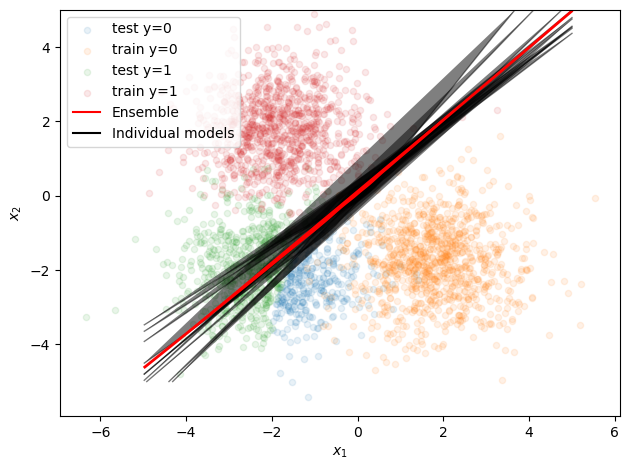

In [ ]:
# Feel free to use my code or make your own. 

# viz datasets
fig, ax = plt.subplots()

for label in [0, 1]:
    ax.scatter(x_test[y_test==label, 0],x_test[y_test==label, 1], s=20, alpha=0.1, label='test y='+str(label))
    ax.scatter(x_train[y_train==label, 0],x_train[y_train==label, 1], s=20, alpha=0.1, label='train y='+str(label))

# Contour plot
k = 200
X = t.stack(t.meshgrid(t.linspace(-5, 5, k), t.linspace(-5, 5, k))).reshape((2, -1)).T
xx = X[:,0].reshape((k,k))
yy = X[:,1].reshape((k,k))

with t.no_grad():
    for i, model in enumerate(models):
        pred = t.softmax(model(X), axis=1)[:,0].numpy()
        zz = pred.reshape((k,k)).astype('float')
        contour = ax.contour(xx, yy, zz, levels=[0.5], alpha=0.5)

        contour.collections[0].set_color('black')
        contour.collections[0].set_linewidth(1)
        # contour.collections[0].set_label('model '+str(i))
        
    pred = t.softmax(model_ens(X), axis=1)[:,0].numpy()
    zz = pred.reshape((k,k)).astype('float')
    contour = ax.contour(xx, yy, zz, levels=[0.5], alpha=1)

    contour.collections[0].set_color('red')
    contour.collections[0].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
from matplotlib.lines import Line2D
line = Line2D([0], [0], label='Ensemble', color='red')
line2 = Line2D([0], [0], label='Individual models', color='black')
# add manual symbols to auto legend
handles.extend([line, line2])
    
ax.legend(handles=handles, loc='upper left')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.tight_layout()

In [ ]:
# import torch.nn as nn
# import torch.optim as optim
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from torch.utils.data import DataLoader

# %matplotlib inline

# class MyClassifier(nn.Module):
#     def __init__(self, n_classes=2):
#         super().__init__()
#         self.fc1 = nn.Linear(2, 64)
#         self.fc2 = nn.Linear(64, n_classes)

#     def forward(self, x):
#         x = t.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


# class MyEnsemble(nn.Module):
#     def __init__(self, models):
#         super().__init__()
#         self.models = nn.ModuleList(models)

#     def forward(self, x):
#         outputs = [model(x) for model in self.models]
#         outputs = t.stack(outputs, dim=0)
#         return outputs


# SGLD 

 
https://www.ics.uci.edu/~welling/publications/papers/stoclangevin_v6.pdf
  
https://github.com/pytorch/pytorch/blob/v1.4.0/torch/optim/sgd.py


In [ ]:
import torch
from torch.optim.optimizer import Optimizer, required


class SGLD(Optimizer):
  
    def __init__(self, params, lr=required, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        if lr is not required and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))

        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(SGLD, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(SGLD, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                if weight_decay != 0:
                    d_p.add_(p.data, alpha=weight_decay)
                if momentum != 0:
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state[
                            'momentum_buffer'] = torch.clone(d_p).detach()
                    else:
                        buf = param_state['momentum_buffer']
                        buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
                    if nesterov:
                        d_p = d_p.add(momentum, buf)
                    else:
                        d_p = buf

                p.data.add_(d_p, alpha=-group['lr'])
                noise_std = torch.Tensor([2*group['lr']])
                noise_std = noise_std.sqrt()
                noise = p.data.new(
                    p.data.size()).normal_(mean=0, std=1)*noise_std
                p.data.add_(noise)

        return 1.0

In [ ]:
optimizer = SGLD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)


In [ ]:
n_models = 10
models = []
for i in range(n_models):
    model = MyClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = SGLD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

    for epoch in range(10):
        
        running_loss = 0.0
        for inputs, labels in train_dl:
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())  # Convert labels to Long data type
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_dl)
        print(f"Model {i+1} | Epoch {epoch+1} | Loss: {epoch_loss:.4f}")

    models.append(model)  # store them for evaluation and ensembling

model_ens = MyEnsemble(models)  # Construct the ensemble model 


Model 1 | Epoch 1 | Loss: 0.3925
Model 1 | Epoch 2 | Loss: 0.2913
Model 1 | Epoch 3 | Loss: 0.3146
Model 1 | Epoch 4 | Loss: 0.4556
Model 1 | Epoch 5 | Loss: 0.4210
Model 1 | Epoch 6 | Loss: 0.4307
Model 1 | Epoch 7 | Loss: 0.3282
Model 1 | Epoch 8 | Loss: 0.4183
Model 1 | Epoch 9 | Loss: 0.4054
Model 1 | Epoch 10 | Loss: 0.2832
Model 1 | Epoch 11 | Loss: 0.1431
Model 1 | Epoch 12 | Loss: 0.1100
Model 1 | Epoch 13 | Loss: 0.2075
Model 1 | Epoch 14 | Loss: 0.1563
Model 1 | Epoch 15 | Loss: 0.0970
Model 1 | Epoch 16 | Loss: 0.0793
Model 1 | Epoch 17 | Loss: 0.0716
Model 1 | Epoch 18 | Loss: 0.1022
Model 1 | Epoch 19 | Loss: 0.1073
Model 1 | Epoch 20 | Loss: 0.0770
Model 1 | Epoch 21 | Loss: 0.0462
Model 1 | Epoch 22 | Loss: 0.0466
Model 1 | Epoch 23 | Loss: 0.0467
Model 1 | Epoch 24 | Loss: 0.0316
Model 1 | Epoch 25 | Loss: 0.0363
Model 1 | Epoch 26 | Loss: 0.0345
Model 1 | Epoch 27 | Loss: 0.0266
Model 1 | Epoch 28 | Loss: 0.0323
Model 1 | Epoch 29 | Loss: 0.0319
Model 1 | Epoch 30 | Lo

In [ ]:
import torch

def accuracy(model, x, y):
    with torch.no_grad():
        model.eval()
        outputs = model(x)
        # print(f"Outputs:{outputs}")
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y).sum().item() / len(y)
    return accuracy

In [ ]:
for i, model in enumerate(models):
    acc_train = accuracy(model, x_train, y_train)
    acc_val = accuracy(model, x_val, y_val)
    acc_test = accuracy(model, x_test, y_test)
    print(f"Model {i+1}: Train Accuracy: {acc_train:.4f}, Validation Accuracy: {acc_val:.4f}, Test Accuracy: {acc_test:.4f}")


Model 1: Train Accuracy: 0.9705, Validation Accuracy: 0.9645, Test Accuracy: 0.6720
Model 2: Train Accuracy: 0.9800, Validation Accuracy: 0.9760, Test Accuracy: 0.9480
Model 3: Train Accuracy: 0.9495, Validation Accuracy: 0.9360, Test Accuracy: 0.8720
Model 4: Train Accuracy: 0.9935, Validation Accuracy: 0.9915, Test Accuracy: 0.6250
Model 5: Train Accuracy: 0.9770, Validation Accuracy: 0.9755, Test Accuracy: 0.7300
Model 6: Train Accuracy: 0.9880, Validation Accuracy: 0.9865, Test Accuracy: 0.8230
Model 7: Train Accuracy: 0.9930, Validation Accuracy: 0.9885, Test Accuracy: 0.7860
Model 8: Train Accuracy: 0.9860, Validation Accuracy: 0.9840, Test Accuracy: 0.7950
Model 9: Train Accuracy: 0.9890, Validation Accuracy: 0.9865, Test Accuracy: 0.6850
Model 10: Train Accuracy: 0.9920, Validation Accuracy: 0.9875, Test Accuracy: 0.4990


In [ ]:

def accuracy(model, x, y):
    with torch.no_grad():
        model.eval()
        outputs = model(x)
        # print(f"Outputs:{outputs}")
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y).sum().item() / len(y)
    return accuracy


def ece(model, x, y, bins=10):
    with torch.no_grad():
        model.eval()
        logits = model(x)
        predictions = torch.argmax(logits, dim=1)
        confidences = torch.softmax(logits, dim=1)
        
        bin_boundaries = torch.linspace(0, 1, bins + 1)
        bin_lowers = bin_boundaries[:-1]
        bin_uppers = bin_boundaries[1:]
        
        ece_sum = 0.0
        acc_sum = 0.0
        num_examples = 0
        
        for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
            in_bin = (confidences.max(dim=1).values >= bin_lower) & (confidences.max(dim=1).values < bin_upper)
            bin_logits = logits[in_bin]
            bin_predictions = predictions[in_bin]
            bin_confidences = confidences[in_bin]
            bin_labels = y[in_bin]
            
            if bin_logits.size(0) == 0:
                continue
            
            bin_accuracy = (bin_predictions == bin_labels).float().mean().item()
            bin_confidence = bin_confidences.max(dim=1).values.mean().item()
            bin_num_examples = bin_logits.size(0)
            
            ece_sum += bin_num_examples * abs(bin_accuracy - bin_confidence)
            acc_sum += bin_num_examples * bin_accuracy
            num_examples += bin_num_examples
        
        ece_val = ece_sum / num_examples
        acc_val = acc_sum / num_examples
        
        return ece_val


def vector_of_results(model):
    columns = ['Acc-train', 'Acc-val', 'Acc-test', 'ECE-train', 'ECE-val', 'ECE-test']
    results = torch.zeros(6)
    results[0] = accuracy(model, x_train, y_train)
    results[1] = accuracy(model, x_val, y_val)
    results[2] = accuracy(model, x_test, y_test)
    results[3] = ece(model, x_train, y_train)
    results[4] = ece(model, x_val, y_val)
    results[5] = ece(model, x_test, y_test)
    return columns, results


with torch.no_grad():
    results = torch.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models):
        model.eval()  
        columns, results[:, i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.982    0.978     0.743      0.016    0.018     0.189
Ensemble model      0.993    0.993     0.917      0.008    0.009     0.076


References : https://chat.openai.com/ 
